## Task 3: Car Price Prediction

## Problem Statement
The car market features a wide variety of vehicles differing in brand, body type, engine specifications, and other features. Each car is associated with a price that is influenced by various characteristics such as the manufacturing year, mileage, engine size, fuel type, transmission, and number of previous owners. Predicting the price of a car based on these attributes is a valuable task for both buyers and sellers. This project aims to develop a machine learning model that can accurately predict the price of a car using its key features.

## 1.Dataset Overview

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

## 2. Data preprocessing

In [16]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
High_Price       0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(2)

In [23]:
df = df.drop_duplicates()


In [24]:
df.duplicated().sum()

np.int64(0)

## 3. Data Vizualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_3916\3436820184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.values, y=top_30.index, palette='colorblind')


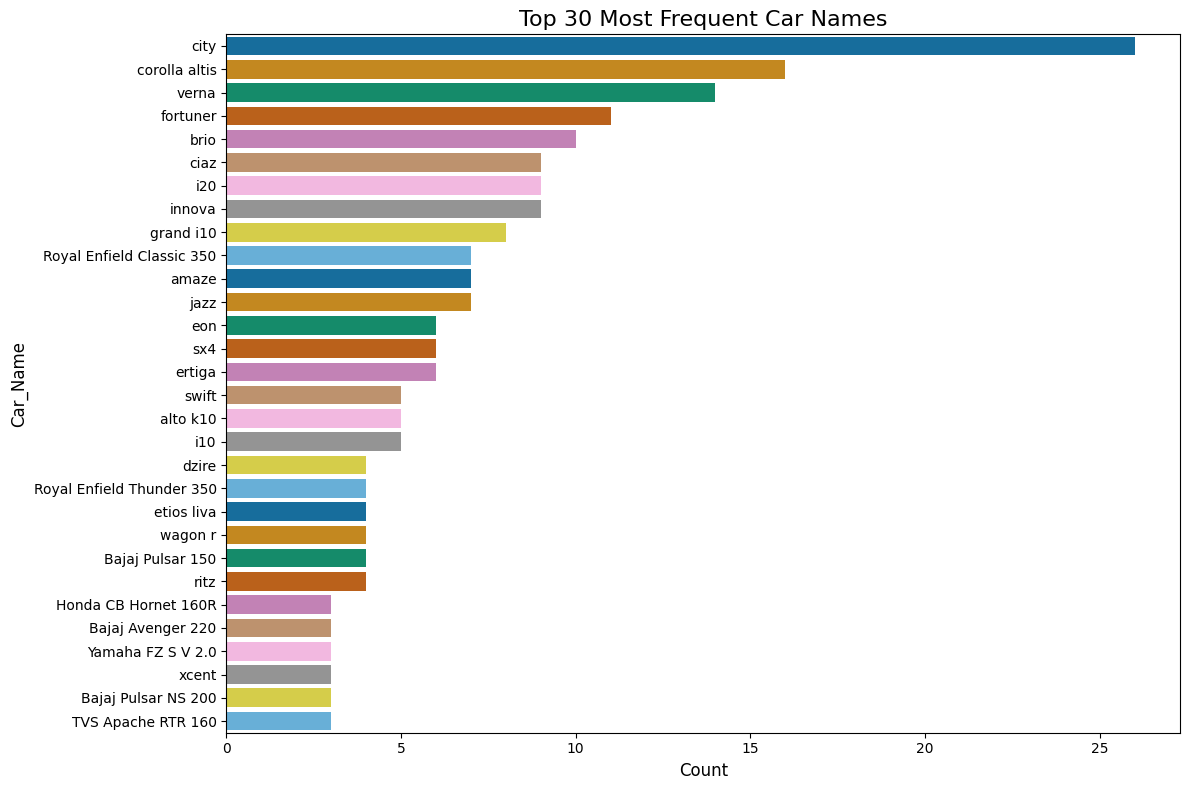

In [8]:
top_30 = df['Car_Name'].value_counts().nlargest(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_30.values, y=top_30.index, palette='colorblind')
plt.title('Top 30 Most Frequent Car Names', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Car_Name', fontsize=12)
plt.tight_layout()
plt.show()

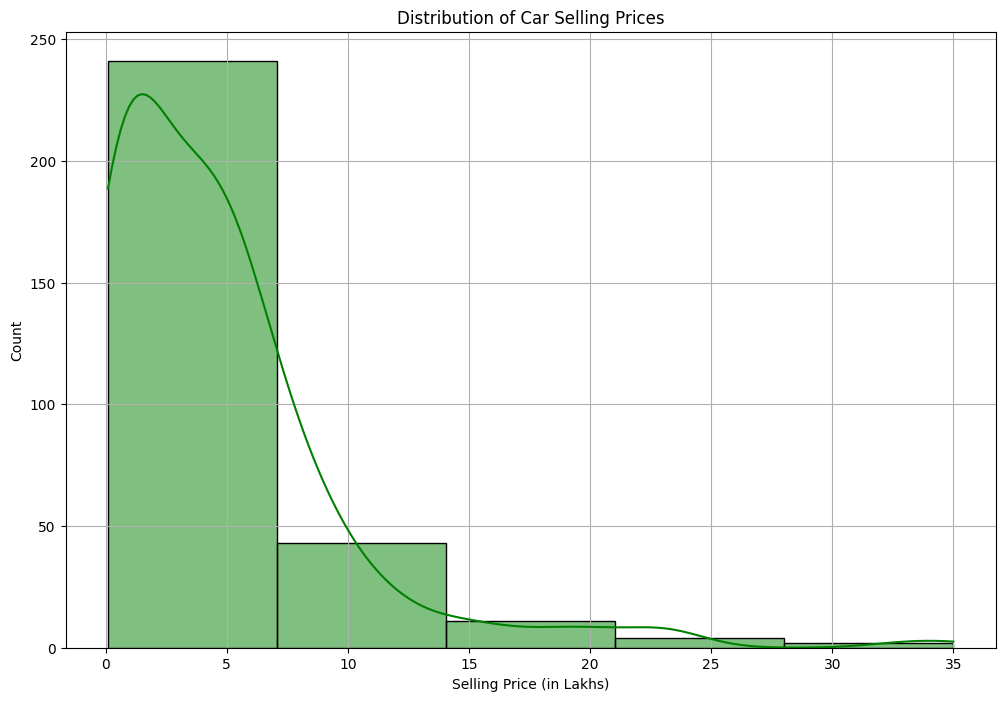

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(df['Selling_Price'], kde=True, color='green', bins=5)
plt.title("Distribution of Car Selling Prices")
plt.xlabel("Selling Price (in Lakhs)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3916\2766202852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='colorblind')


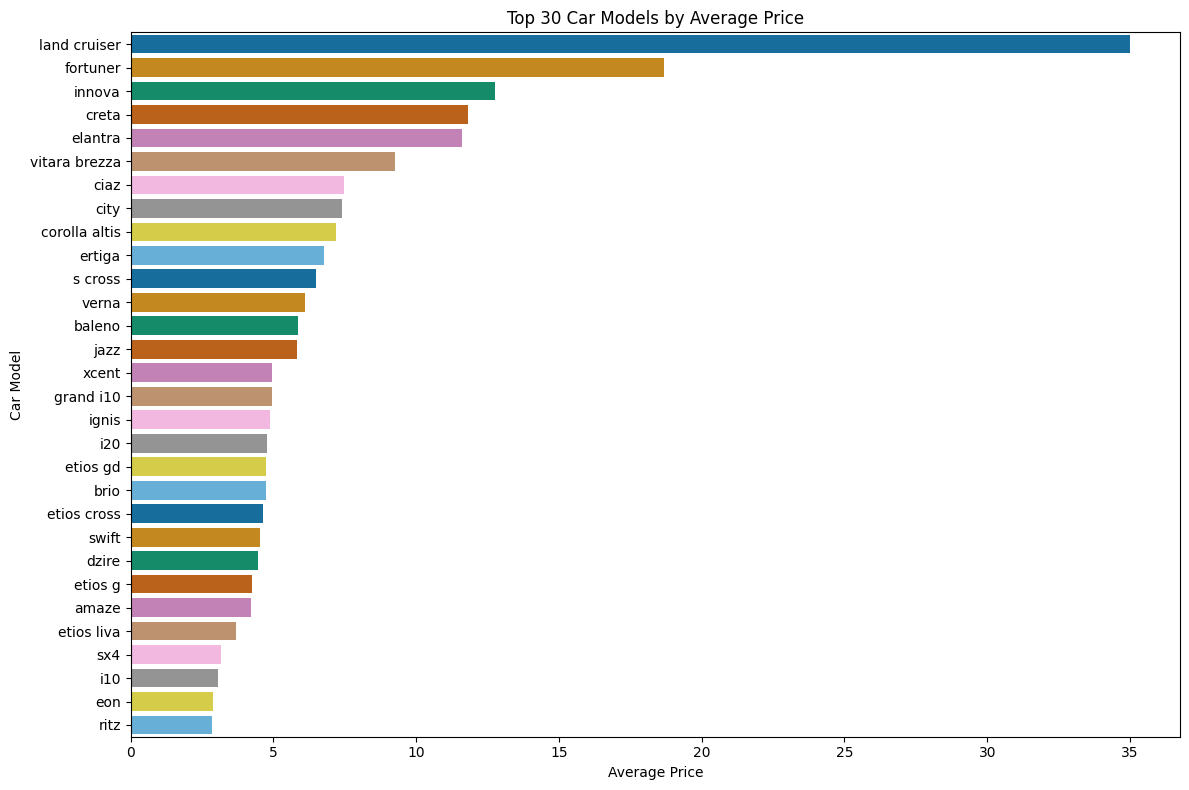

In [10]:
avg = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

top_car_models = avg.head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='colorblind')
plt.title('Top 30 Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

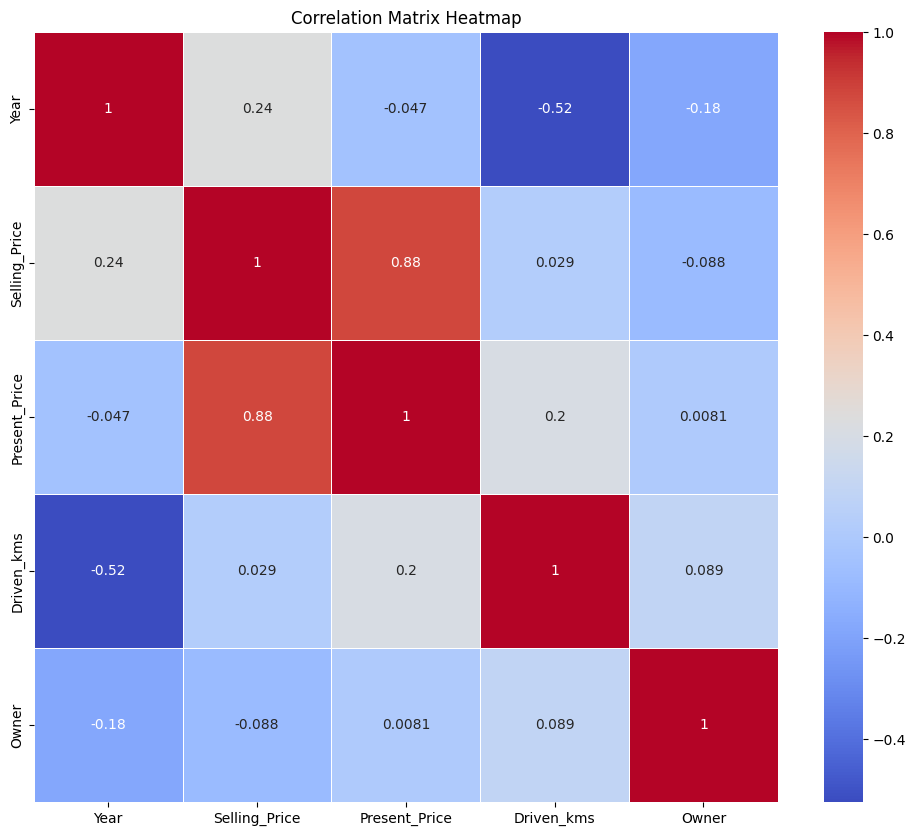

In [11]:
plt.figure(figsize=(12, 10))  
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


## 5. ML Model Implementation

In [25]:
df['High_Price'] = df['Selling_Price'].apply(lambda x: 1 if x >= 5 else 0)


In [29]:
X = df[['Present_Price', 'Driven_kms', 'Year']]  # Add more if needed
y = df['High_Price']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [32]:


# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Store results
results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc


In [33]:
for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.2f}")


Logistic Regression: Accuracy = 0.90
KNN: Accuracy = 0.58
Decision Tree: Accuracy = 0.88
Random Forest: Accuracy = 0.93


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 0.06666666666666667
Mean Squared Error: 0.06666666666666667
Root Mean Squared Error: 0.2581988897471611
R² Score: 0.7129186602870814


## 6 Model Comparison

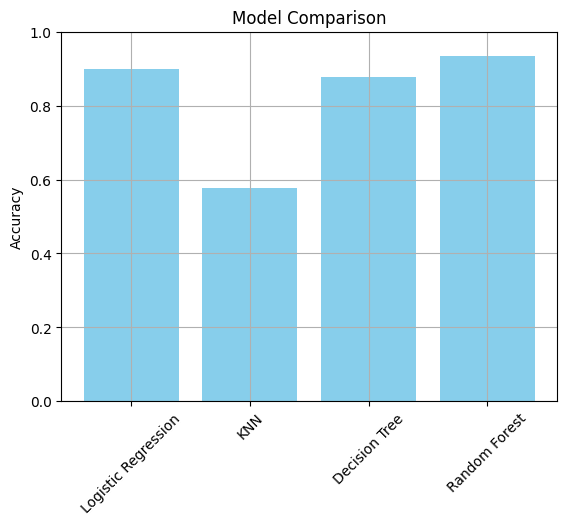

In [35]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## conclusion:In this project, we analyzed and modeled the dataset to predict target values using regression techniques.
Through data preprocessing,visualization, and model development, we constructed an accurate and interpretable model.